<a href="https://colab.research.google.com/github/dsgaldino/Metodos_Analiticos_Redes_Sociais/blob/main/roteadores_internet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa Final

## Métodos Analíticos para Redes Sociais

***Aluno:*** Diego Soares Galdino

***Prof.:*** Marcelo de Oliveira Rosa


### Bibiliotecas

In [1]:
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




### Rede complexa de conexões entre roteadores da Internet

In [4]:
# Leitura da Rede
router_inet <- read.graph('router_INET.txt', 'edgelist', directed = FALSE)

In [5]:
# Cópias da rede e dos nós
arch_copy <- router_inet

In [6]:
  slabel <- NA #sem_label
  vsize <- 2.5

## Respostas

### 1. Qual a representação adotada?

    a. Que dados foram considerados como nós, arestas, pesos, e por quê?

In [ ]:
summary(arch_copy)

print(arch_copy)

# Número de vértices
num_vertices <- vcount(arch_copy)
print(paste("Número de vértices:", num_vertices))

# Número de arestas
num_arestas <- ecount(arch_copy)
print(paste("Número de arestas:", num_arestas))

In [ ]:
# Obteção pares de nós conectados por arestas
edge_pairs <- ends(arch_copy, E(arch_copy))

# Cálculo do grau para cada nó
grau <- degree(arch_copy)

# Cálculo do coeficiente de clusterização para cada nó
coeficiente_clusterizacao <- transitivity(arch_copy, type = "weighted")

# Verificação as arestas únicas (nomes)
unique_edge_names <- unique(E(arch_copy)$name)

# Verificação os pesos das arestas únicas
unique_edge_weights <- unique(E(arch_copy)$weight)

In [ ]:
# Nós
cat("\nPares de nós conectados por arestas:\n")
print(head(edge_pairs))

cat("\nGrau de cada nó:\n")
print(head(grau))

cat("\nCoeficiente de clusterização para cada nó:\n")
print(head(coeficiente_clusterizacao))

# Arestas
num_arestas <- ecount(arch_copy)
print(paste("Número de arestas:", num_arestas))

cat("\nArestas únicas (nomes):\n")
print(unique_edge_names)

cat("\nPesos das arestas únicas:\n")
print(unique_edge_weights)

# Número de vértices
num_vertices <- vcount(arch_copy)

print(paste("Número de vértices:", num_vertices))

### 2 - Qual a melhor forma de visualizar a rede complexa?
    a. Usar layouts diferentes para melhor visualizar a conectividade dos nós

In [ ]:
# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

coordenadas <- layout_with_drl(router_inet)
plot(router_inet, vertex.label=slabel, vertex.size=vsize,layout=coordenadas)

In [ ]:
# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Visualização simples da rede
plot(arch_copy, layout = layout.auto, vertex.label=slabel, vertex.size=vsize, main = "Automático")

In [ ]:
# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Ajuste do layout usando "layout with fr"
plot(arch_copy, layout = layout_with_fr, vertex.label=slabel, vertex.size=vsize, main = "Layout with FR")

### 3. Qual a distribuição de valores das seguintes métricas:
    a. Grau/grau ponderado
    b. Caminho/caminho ponderado
    c. Coeficiente de clusterização (transitividade) (com ou sem peso)


In [ ]:
# Cálculo do grau para cada nó
grau <- degree(arch_copy)

# Cálculo do grau ponderado para cada nó
grau_ponderado <- strength(arch_copy)

# Visualização a distribuição de grau
hist(grau, main = "Distribuição de Grau", xlab = "Grau", ylab = "Frequência", col = "blue")

# Visualização a distribuição de grau ponderado
hist(grau_ponderado, main = "Distribuição de Grau Ponderado", xlab = "Grau Ponderado", ylab = "Frequência", col = "green")

In [ ]:
# Cálculo do caminho mais curto entre dois nós (caminho não ponderado)
caminho <- shortest.paths(arch_copy, mode = "all")

# Cálculo do caminho mais curto ponderado entre dois nós
caminho_ponderado <- shortest.paths(arch_copy, mode = "all", weights = E(arch_copy)$weight)

# Remoção valores infinitos e NaNs dos caminhos mínimos
caminho <- caminho[is.finite(caminho)]
caminho_ponderado <- caminho_ponderado[is.finite(caminho_ponderado)]

# Visualização a distribuição de caminho
hist(caminho, main = "Distribuição de Caminho", xlab = "Caminho", ylab = "Frequência", col = "blue")

# Visualização a distribuição de caminho ponderado
hist(caminho_ponderado, main = "Distribuição de Caminho Ponderado", xlab = "Caminho Ponderado", ylab = "Frequência", col = "green")

In [ ]:
# Cálculo do coeficiente de clusterização para cada nó (com pesos nas arestas)
coeficiente_clusterizacao <- transitivity(arch_copy, type = "weighted")

# Remoção valores NaNs do coeficiente de clusterização
coeficiente_clusterizacao <- coeficiente_clusterizacao[!is.nan(coeficiente_clusterizacao)]

# Visualização a distribuição do coeficiente de clusterização
hist(coeficiente_clusterizacao, main = "Distribuição do Coeficiente de Clusterização", xlab = "Coeficiente de Clusterização", ylab = "Frequência", col = "blue")

### 4. Qual o tipo de agrupamento (formação de comunidades) melhor se encaixa para a rede complexa

In [ ]:
# Método de Louvain

# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Aplicação do algoritmo de detecção de comunidades Louvain no grafo não direcionado
comunidades_louvain <- cluster_louvain(arch_copy_undirected)

# Avaliação a qualidade das comunidades usando a métrica de modularidade
modularidade <- modularity(comunidades_louvain)

# Exibição da modularidade
cat("Modularidade das Comunidades (Louvein):", modularidade, "\n")

Modularidade das Comunidades (Louvein): 0.861813 


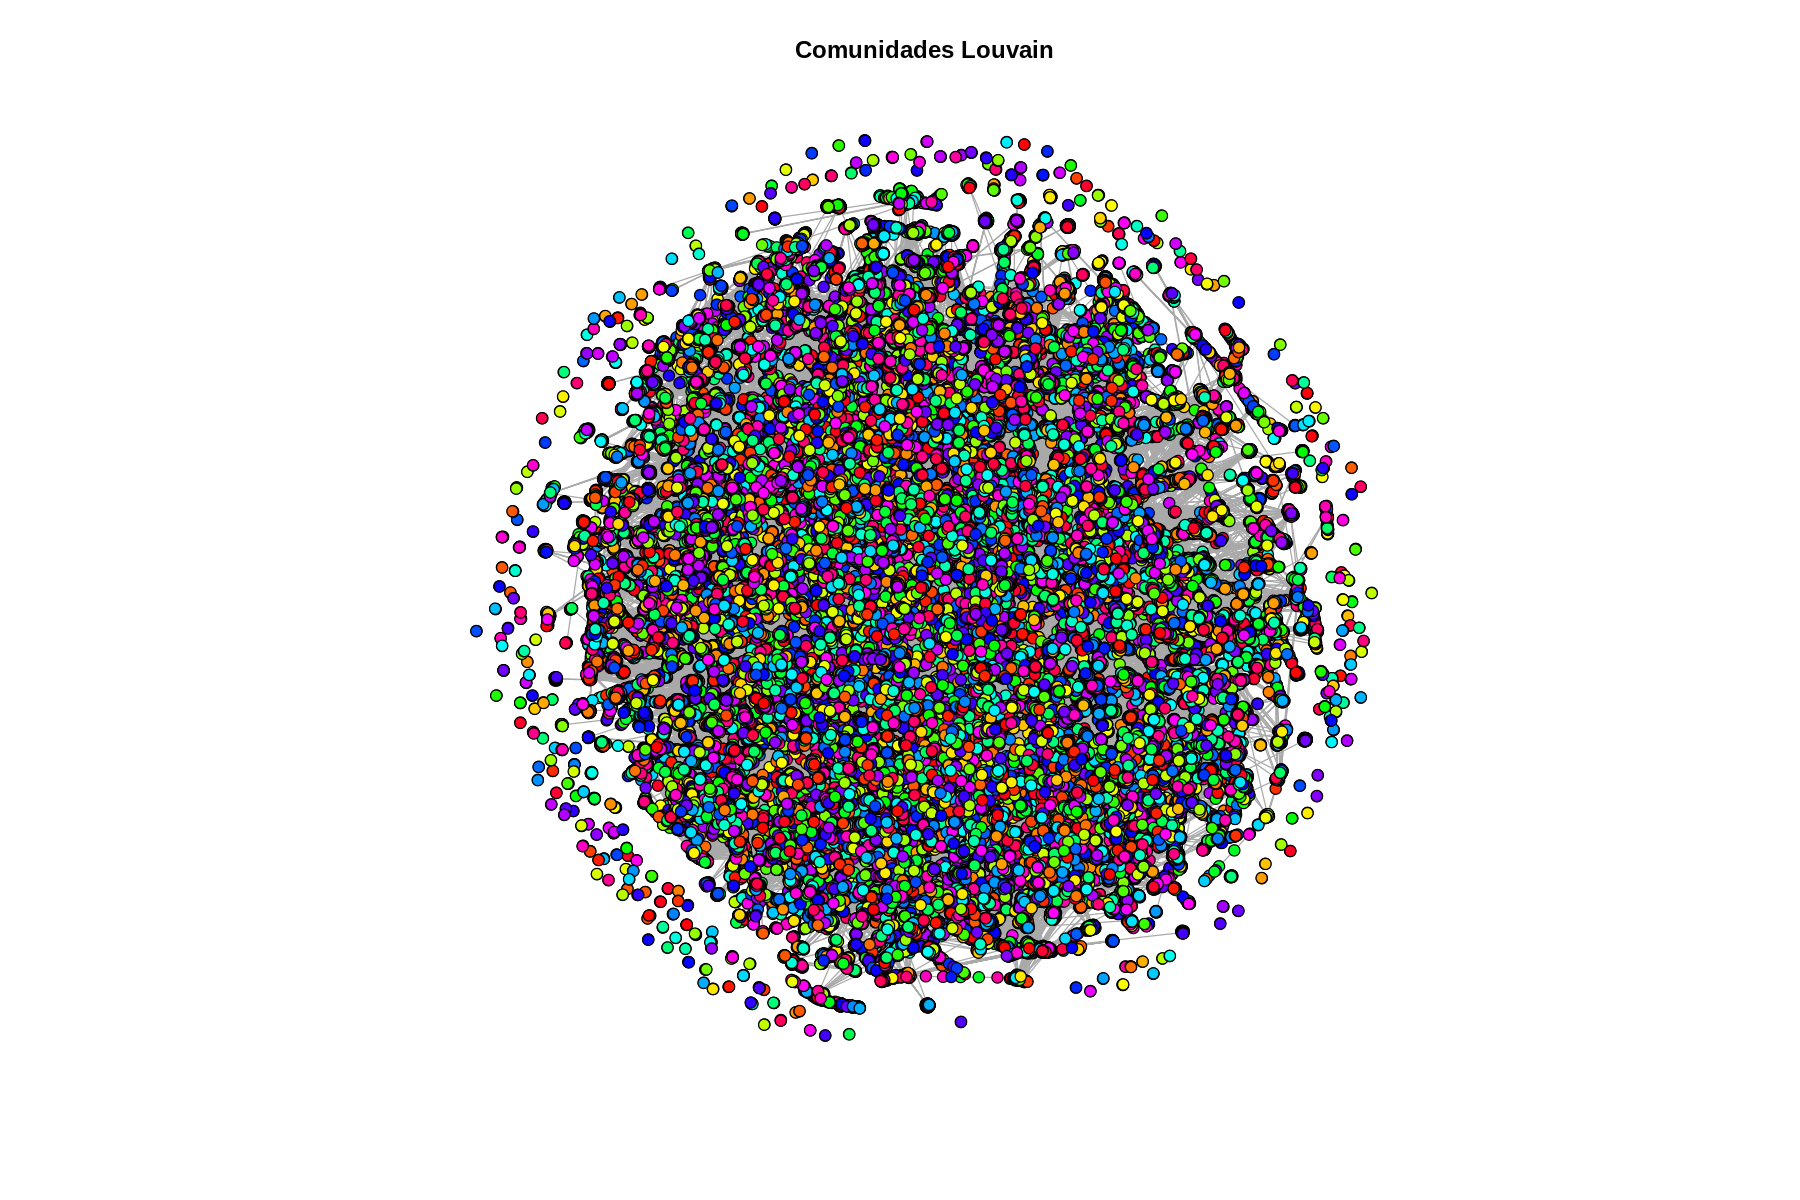

In [ ]:
# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Aplicação do algoritmo de detecção de comunidades Louvain no grafo não direcionado
comunidades_louvain <- cluster_louvain(arch_copy_undirected)

# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_louvain$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout = layout_with_drl,  vertex.label=slabel, vertex.size=vsize, main = "Comunidades Louvain", vertex.color = rainbow(length(unique(comunidades_louvain$membership))))

In [ ]:
# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_walktrap$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout = layout_with_drl,  vertex.label=slabel, vertex.size=vsize, main = "Comunidades Walktrap", vertex.color = rainbow(length(unique(comunidades_walktrap$membership))))

In [ ]:
# Método Edge Betweeness

# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Cálculo da centralidade de betweeness das arestas
centralidade_betweeness <- edge.betweenness(arch_copy_undirected)

# Identificação das arestas com maior centralidade de betweeness para remoção
arestas_remover <- which(centralidade_betweeness == max(centralidade_betweeness))

# Remoção das arestas com maior centralidade de betweeness
arch_copy_sem_arestas <- delete_edges(arch_copy_undirected, arestas_remover)

# Aplicação do algoritmo de detecção de comunidades no grafo sem as arestas
comunidades_edge_betweeness <- cluster_fast_greedy(arch_copy_sem_arestas)

# Avaliação da qualidade das comunidades usando a métrica de modularidade
modularidade_edge_betweeness <- modularity(comunidades_edge_betweeness)

# Exibição da modularidade
cat("Modularidade das Comunidades (Edge Betweeness):", modularidade_edge_betweeness, "\n")

In [ ]:
# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_edge_betweeness$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout =layout_with_drl,  vertex.label=slabel, vertex.size=vsize, main = "Comunidades Edge Betweeness", vertex.color = rainbow(length(unique(comunidades_edge_betweeness$membership))))


In [ ]:
# com base nos valores de modularidade, todos os três métodos parecem ser adequados para detectar comunidades na rede complexa.
# No entanto, o método Louvain obteve a modularidade mais alta, o que indica uma divisão de comunidades ligeiramente melhor em
# comparação com os outros dois métodos. Portanto, o método Louvain pode ser considerado o melhor para essa rede específica.

### 5. Qual o nó mais importante e por quê?

In [ ]:
# Centralidade de Grau (Degree Centrality)

# Cálculo da centralidade de grau para todos os nós
centrality_degree <- degree(arch_copy)

# Encontrar o nó com o maior grau
no_mais_importante <- which.max(centrality_degree)

# Exibição o nó mais importante e seu grau
print(paste("Nó mais importante (por Grau):", V(arch_copy)$name[no_mais_importante]))
print(paste("Grau:", centrality_degree[no_mais_importante]))


[1] "Nó mais importante (por Grau): "
[1] "Grau: 1071"


In [ ]:
# Centralidade de Próximidade (Closeness Centrality)

# Cálculo da centralidade de proximidade para todos os nós
centrality_closeness <- closeness(arch_copy, mode = "all")

# Encontrar o nó com a maior centralidade de proximidade
no_mais_importante <- which.max(centrality_closeness)

# Exibição do nó mais importante e sua centralidade de proximidade
print(paste("Nó mais importante (por proximidade):", V(arch_copy)$name[no_mais_importante]))
print(paste("Centralidade de Proximidade:", centrality_closeness[no_mais_importante]))


In [ ]:
#Centralidade de Intermediação (Betweenness Centrality)

# Cálculo da centralidade de intermediação para todos os nós
centrality_betweenness <- betweenness(arch_copy, directed = TRUE, normalized = TRUE)

# Encontrar o nó com a maior centralidade de intermediação
no_mais_importante_betweenness <- which.max(centrality_betweenness)

# Exibição do nó mais importante e sua centralidade de intermediação
print(paste("Nó mais importante (por intermediação):", V(arch_copy)$name[no_mais_importante_betweenness]))
print(paste("Centralidade de Intermediação:", centrality_betweenness[no_mais_importante_betweenness]))

In [ ]:
#Centralidade de Vetor Próprio (Eigenvector Centrality)

# Cálculo da centralidade de vetor próprio para todos os nós
centrality_eigenvector <- eigen_centrality(arch_copy)$vector

# Encontrar o nó com a maior centralidade de vetor próprio
no_mais_importante_eigenvector <- which.max(centrality_eigenvector)

# Exibição do nó mais importante e sua centralidade de vetor próprio
print(paste("Nó mais importante (por vetor próprio):", V(arch_copy)$name[no_mais_importante_eigenvector]))
print(paste("Centralidade de Vetor Próprio:", centrality_eigenvector[no_mais_importante_eigenvector]))

In [ ]:
# O nó com maior centralidade de intermediação é crucial na rede elétrica dos EUA, pois atua como ponto de passagem essencial para manter a conexão e evitar falhas em cascata,
# garantindo a estabilidade do sistema. Sua posição estratégica otimiza a transmissão de energia e minimiza interrupções.

### 6. Qual a aresta mais importante e por quê?

In [ ]:
# Calcular a centralidade de intermediação (Betweenness) das arestas usando o algoritmo Louvain
louvain_values <- cluster_louvain(arch_copy)

# Encontrar o índice da aresta mais importante
indice_aresta_mais_importante <- which.max(louvain_values$membership)

# Obter informações da aresta mais importante
aresta_mais_importante <- E(arch_copy)[indice_aresta_mais_importante]

# Exibir informações da aresta mais importante com base na Centralidade de Intermediação
cat("Aresta mais importante (Centralidade de Intermediação):", aresta_mais_importante, "\n")


Aresta mais importante (Centralidade de Intermediação): 192191 


In [ ]:
# A aresta 192191 desempenha um papel crítico na conexão de diferentes partes da rede e pode atuar como uma espécie
# de "ponte" ou "ponto de controle" para a comunicação entre outros nós.

### 7. Qual o diâmetro da rede?

In [7]:
# Calcular o diâmetro da rede
diametro <- diameter(arch_copy, directed = FALSE)

# Exibir o diâmetro
cat("Diâmetro da rede:", diametro, "\n")

Diâmetro da rede: 20 


### 8. Como você classificaria a rede?
    a. Aleatória, mundo pequeno, escala-livre

In [ ]:
# Com base no diâmetro da rede e na importância da centralidade de intermediação, a classificação para a rede seria "escala-livre".
# Isso pois possui uma estrutura que não é puramente aleatória nem estritamente em forma de mundo pequeno, mas exibe características
# de uma rede com hnós altamente conectados que desempenham um papel fundamental na manutenção da integridade do sistema.

### 9. Há alguma informação subjacente (indireta em relação às métricas) que você vislumbrou na rede?

In [ ]:
# A rede representa um sistema complexo com comunidades bem definidas, um nó central altamente conectado e uma aresta crítica para a conectividade global.
# Características que a rede desempenha um papel significativo em facilitar a comunicação e a transferência de recursos entre diferentes partes do sistema.